In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [2]:
print(train_data.shape) # the shape of training data, 404 training samples
print(test_data.shape)  # the shape of test data, 102 test samples

(404, 13)
(102, 13)


In [3]:
# Preparing the data
# Normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

train_data -= mean
test_data /= std

In [4]:
# Build a small neural network
# Because our training data are very small, build a small one to prevent overfitting
# For example, less hidden layer
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    # The basic setting of scalar regression 
    # Allow the network to predict the value freely, without any constraints
    model.add(layers.Dense(1))
    # mse : mean squared error (Square value bewteen predicted value and traget value)
    # mae : mean absolute error
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [5]:
# K-fold validation
import numpy as np
k = 4
num_val_samples = len(train_data)//k # divived 4 equal parts in training data
num_epochs = 100
all_scores = []
for i in range(k):
    print("Process fold #", i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    # Training data
    partial_train_data = np.concatenate(
    [train_data[:i*num_val_samples],
     train_data[(i+1)*num_val_samples:]],
     axis = 0)
    partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]],
     axis=0)
    model = build_model()
    # Slient mode
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    # Use validation data to evaluate the model
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Process fold # 0
Process fold # 1
Process fold # 2
Process fold # 3


In [12]:
# Check the results
print(history.history.keys())
print(all_scores)
print(np.mean(all_scores))

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
[3.5852551460266113, 2.7249906063079834, 3.127138376235962, 3.445277690887451]
3.220665454864502


In [13]:
# Train 500 times and record all the validation score
num_epochs = 500
all_scores_histories = []
for i in range(k):
    print("Process fold #", i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    # Training data
    partial_train_data = np.concatenate(
    [train_data[:i*num_val_samples],
     train_data[(i+1)*num_val_samples:]],
     axis = 0)
    partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]],
     axis=0)
    
    # Build the keras model
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0, validation_data=(val_data,val_targets))
    mae_history = history.history['val_loss']
    all_scores_histories.append(mae_history)

Process fold # 0
Process fold # 1
Process fold # 2
Process fold # 3


In [14]:
all_scores_histories

[[103.67354987412783,
  84.82853985971357,
  99.28164790880562,
  144.29832539129265,
  108.09487742227087,
  193.62610829805973,
  73.64431192237701,
  70.37291838243456,
  137.18362366656675,
  75.80512160905536,
  63.009535626204,
  64.15388598713544,
  61.85430394383355,
  55.462752735597256,
  63.35816806864621,
  61.34346164525547,
  61.39655497451016,
  52.44216192229294,
  54.47673125048675,
  65.34410317841692,
  63.495167441787586,
  48.9802267145781,
  122.77822248770458,
  52.35929080009135,
  47.87858217953713,
  102.58885817678407,
  44.67656116919318,
  42.46657333479754,
  47.299549330957234,
  56.76748549251813,
  45.52702059345274,
  55.24131018956109,
  42.17026266395714,
  51.100006390920846,
  38.54252773182153,
  52.13269139553125,
  36.34742991130172,
  154.04506458008967,
  50.527528983665896,
  35.221134302971684,
  42.63072824964558,
  63.618181361743055,
  47.3575949359901,
  37.9339456947631,
  35.14711600009324,
  44.94428314997511,
  41.36810500939133,
  3

In [16]:
# The average of the per(-epoch MAE scores for all folds
average_mae_history = [np.mean([x[i] for x in all_scores)_histories]) for i in range(num_epochs)]

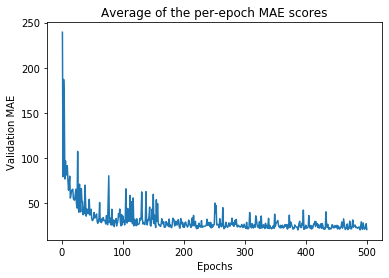

In [17]:
# Plot the graph
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Average of the per-epoch MAE scores')
plt.show()
# The details is difficult to observe

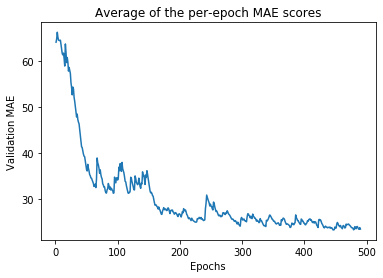

In [19]:
# Make the curve smoother to observer
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Average of the per-epoch MAE scores')
plt.show()

In [20]:
model = build_model()
# Train model on the entirety of the data
model.fit(train_data, train_targets, epochs=80, batch_size=16,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 879us/step


In [21]:
test_mae_score

29.978654861450195